In a (weak) stationary time series, there is no:

* systematic change in mean (no trend)
* systematic change in variance
* periodic variations

**Autocovariance**

$$
\gamma_k = \gamma(t,t+k) \approx \frac{\sum^{N-k}_{t=1}(x_t - \bar{x})(x_{t+k}-\bar{x})}{N}
$$

**Autocorrelation**

$$
\rho_k = \frac{\gamma_k}{\gamma_0} \\
\rho_k = \frac{\sum^{N-k}_{t=1}(x_t - \bar{x})(x_{t+k}-\bar{x})}{\sum^N_{t=1}(x_t - \bar{x})^2}
$$

## Random Walk
### Brownian Motion

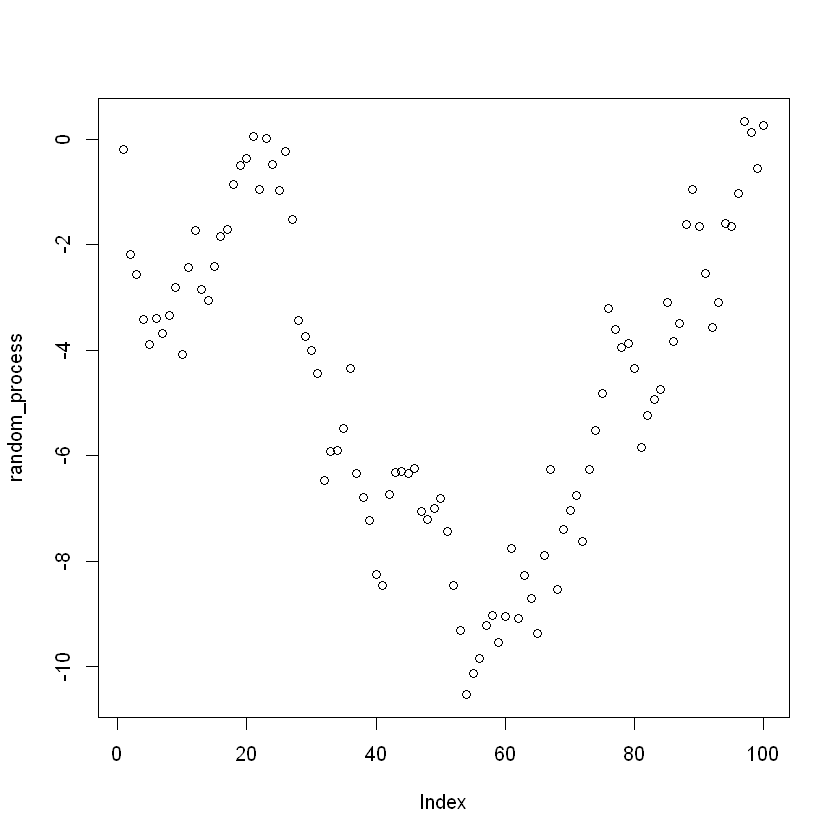

In [2]:
random_process = cumsum(rnorm(100))
plot(random_process)

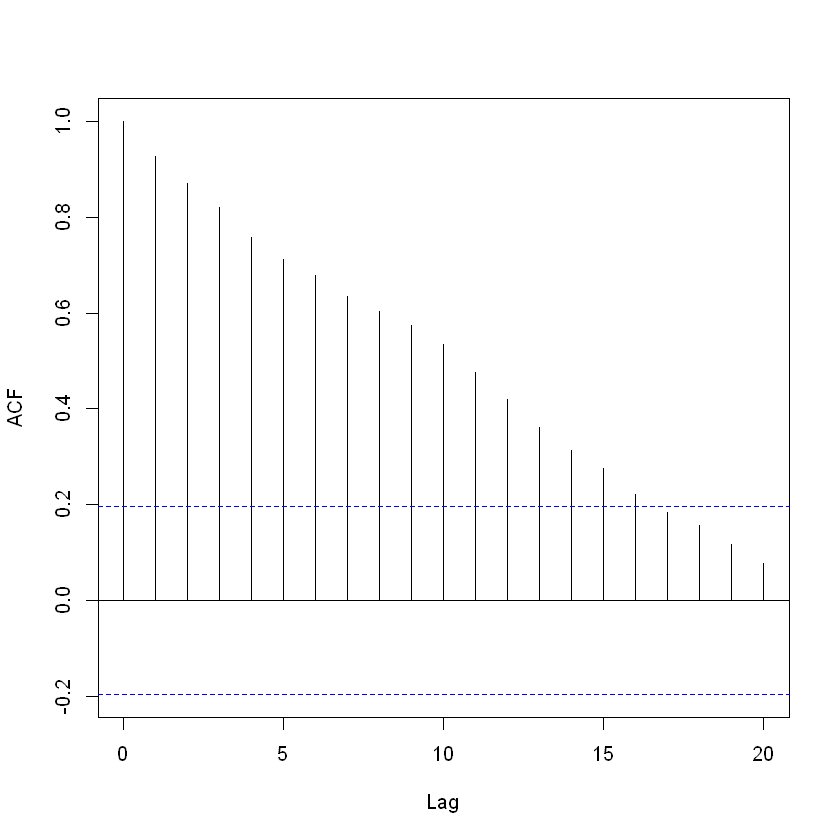

In [3]:
acf(random_process, main='')

the above is clearly non-stationary process. We can get a stationary process in this case by subtracting the previous value from current value:
$$
X_t - X_{t-1} = N(0,1)
$$

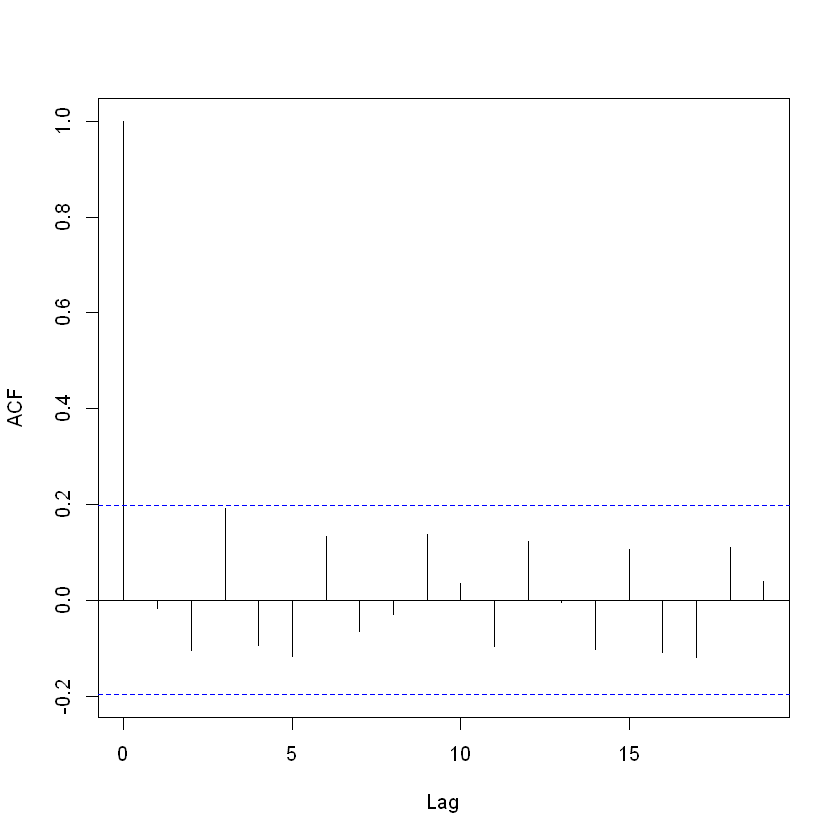

In [4]:
acf(diff(random_process), main='')

## Moving average process

$$
X_t = Z_t + w_1 Z_{t_z}+w_2 Z_{t-2}+\dots+w_qZ_{t-q}
$$

notice the difference from the Brownian motion:

$$
X_t = \sum_{i=1}^t Z_i
$$

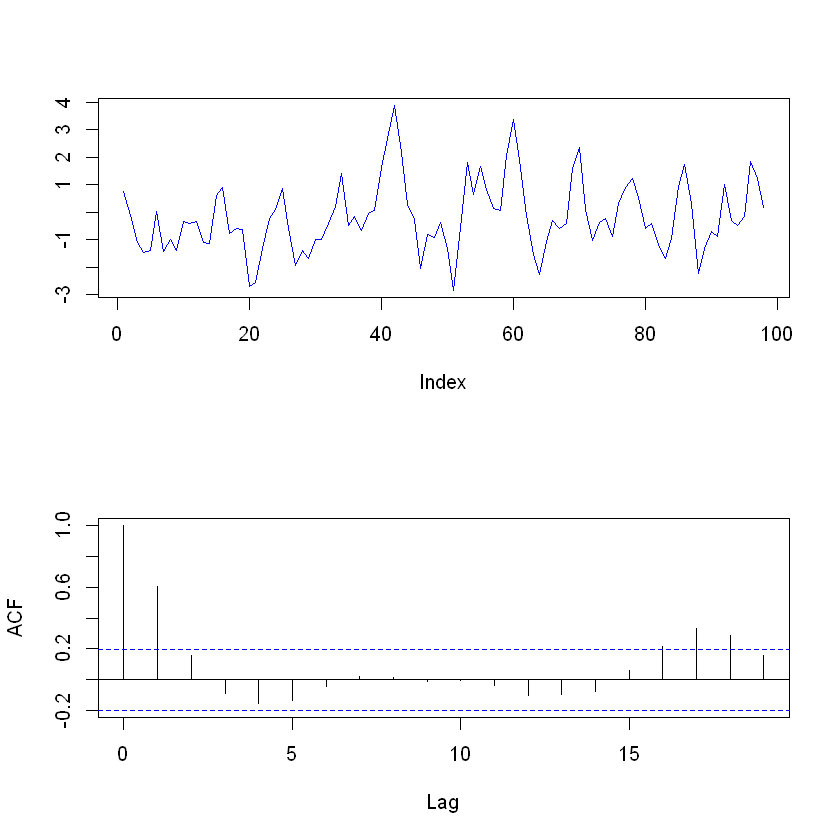

In [6]:
T = 100
noise = rnorm(T)
ma_2 = NULL

for (i in 3:T) {
  ma_2[i-2] = noise[i] + .7*noise[i-1] + .2*noise[i-2]
}

par(mfrow=c(2,1))

plot(ma_2, type='l', ylab='', col='blue')
acf(ma_2, main='')

### Stationarity

We say a process is weakly stationary if:

1. Mean function: $\mu(t) = \mu$
2. ACF: $\gamma(t_1, t_2) = \gamma(t_2 - t_1) = \gamma(\tau)$

The point 2 means that it doesn't matter where you are in the process, but how far they are separated. **Not sure what this means**. 

**Question**: why stationarity is crucial in formulating a model from data?

**Answer**: probably because only a stationary process has constant parameters like $\mu$ and $\sigma^2$.

### Problem 1

Given a MA(2) process: 

$X_t = Z_t + .5Z_{t-1} + .5Z_{t-2}, \text{where } \sigma^2=1$.

What is the autocovariance at lag zero? That is, calculate $\gamma(0)$?

**Solution**

$$
\gamma(0) = \frac{\sum^{N-k}(x_t - \bar{x})(x_{t+k}+\bar{x})}{N} \\
= E[X_tX_t]
= E[X_t^2]
$$

$$
E[X_t^2] = E[(\beta_0Z_t + \beta_1Z_{t-1} + \beta_2Z_{t-2})^2] \\
E[\beta_0^2Z_t^2] = \beta_0^2\sigma^2 \\
E[\beta_1^2Z_{t-1}^2] = \beta_1^2\sigma^2 \\
E[\beta_2^2Z_{t-2}^2] = \beta_2^2\sigma^2 \\
$$

$E[\beta_i\beta_jZ_{t-i}Z_{t-k}] = 0$, where $i \neq j$, since $Z_{t-i}$ and $Z_{t-k}$ are independent their expected value is 0. Therefore $E[X_t^2]$:

$$
\gamma(0) = \sigma^2 \sum_{i=0}^{k} \beta_i^2 \\
= \sigma^2(1^2 + .5^2 + .5^2) = 1.5
$$

### Problem 2

Given the same MA(2) process as specified above, calculate the autocorrelation function at lag 2 (k=2).

$$
E[X_tX_{t+k}] = E[(\beta_0Z_t + \beta_1Z_{t-1}+\beta_2Z_{t-2})(\beta_0Z_{t+k} + \beta_1Z_{t+k-1}+\beta_2Z_{t+k-2})] \\
= E[\beta_0\beta_0Z_tZ_{t+k}+\beta_0\beta_1Z_tZ_{t+k-1} + \beta_0\beta_2Z_tZ_{t+k-2}+\\
\beta_1\beta_0Z_{t-1}Z_{t+k}+\beta_1\beta_1Z_{t-1}Z_{t+k-1} + \beta_1\beta_2Z_{t-1}Z_{t+k-2}+\\
\beta_2\beta_0Z_{t-2}Z_{t+k}+\beta_2\beta_1Z_{t-2}Z_{t+k-1} + \beta_2\beta_2Z_{t-2}Z_{t+k-2}
]
$$

If you examine all the terms inside the above expectation they are all 0 except for those that $k \leq q$ (where k is lag and q is the order of the term), thus in our case only terms $Z_t$ and $Z_{t+k-2}$ (k = 2, q = 2, k=q) are non-zero:

$$
E[\beta_0\beta_0Z_tZ_{t+k}] = 0 \\
E[\beta_1\beta_0Z_tZ_{t+k-1}] = 0 \\
E[\beta_0\beta_2Z_tZ_{t+k-2}] = \beta_0\beta_2E[Z_tZ_{t+k-2}] = \beta_0\beta_2E[Z_t^2] = \beta_0\beta_2\sigma^2 \\
$$

therefore $\gamma(2) = \beta_0\beta_1\sigma^2$, given $\sigma^2=1, \beta_0=1, \beta_2=.5$, $\gamma(2) = .5$.

We are not done here, we still need to compute $\rho(2) = \frac{\gamma(2)}{\gamma(0)} = .5/1.5 = .033$

## Geometric Series

Geometric series $\sum_{k=1} ar^{k-1} = \frac{a}{1-r}$ (convergent) if $\left | r \right | < 1$.

**Question**: is $\sum \frac{1}{2^k}$ convergent and what it converges to?

**Solution**:
$$
\begin{aligned}
\sum \frac{1}{2^k} &= \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \dots \\
&= \frac{1}{2}(\frac{1}{2})^0 + \frac{1}{2}*(\frac{1}{2})^1 + \frac{1}{2}*(\frac{1}{2})^2 \\
&= \sum_{k=0}\frac{1}{2}*(\frac{1}{2})^k \\
&= \sum_{k=1}\frac{1}{2}*(\frac{1}{2})^{k-1}
\end{aligned}
$$

Since $a = 1/2$ and $r = 1/2$, the series converges to $\frac{1/2}{1-1/2} = 1$

**Question**: Determine if the geometric series $-3 + \frac{3}{2} - \frac{3}{4} + \frac{3}{8} - \dots$ is convergent or divergent, and find the sum of the series if it is convergent.

$$
\begin{aligned}
-3 + \frac{3}{2} - \frac{3}{4} + \frac{3}{8} - \dots &= \\
\sum_{k=1}-3(-\frac{1}{2})^{k-1}
\end{aligned}
$$

$a = -3, r=-1/2$, thus it converges to $\frac{-3}{1+.5} = -2$

**Question**: Express the rational function as a geometric series: $\frac{4}{1+x}$
$a = 4, r = -x$, thus $\sum_{k=1} 4 (-x)^{k-1} = 4 - 4x + 4x^2 - 4x^3 + \dots$

## Invertability

$$
\begin{aligned}
\text{MA}(p) &\Rightarrow \text{AR}(\infty) \\
\text{MA}(p) &\Rightarrow X_t = Z_t + \beta Z_{t-1}, X_t=\beta(B)Z_t \\
\text{AR}(\infty) &= Z_t = \beta(B)^{-1}X_t
\end{aligned}
$$

where $\text{MA}(p)$ consists of noise terms, whilst $\text{AR}(p)$ consists of past terms (this is by the definition of two processes).

A process is invertable if $Z_t = \sum^{\infty}_{n=0}(-\beta)^nX_{t-n}$ and $\left | \beta \right |< 1$ which makes the series convergent and means that recent past observations are give more weight than distant ones.

A convergent series is the only series that can be actually modeled since it has a finate number of terms.

**Example**

Model 1: $X_t = Z_t + 2Z_{t-1}$

Model 2: $X_t = Z_t + \frac{1}{2}Z_{t-1}$

Inverting $X_t = Z_t + \beta Z_{t-1}$ using backward shift operator:
$$
X_t = \beta(B)Z_{t},\quad \beta(B) = 1 + \beta B \\
$$

we find $Z_t$ by inverting $\beta(B)$:

$$
\beta(B)^{-1}X_t = Z_t \\
\beta(B)^{-1} = \frac{1}{1 + \beta B} = 1 -\beta B + \beta^2B^2 - \beta^3B^3 + \dots
$$

notice that $\frac{1}{1 + \beta B}$ is a geometric series $\frac{a}{1 -r}$, where $a = 1$ and $r = -\beta B$. If $| -\beta B | < 1$ it can be expressed as:

$$
\begin{aligned}
\frac{1}{1 + \beta B} &= \sum_{k=1} 1*(-\beta B)^{k-1} \\
&= 1 - \beta B + \beta^2B^2 - \dots
\end{aligned}
$$

then we obtain:
$$
\begin{aligned}
\beta(B)^{-1}X_t &= X_t - \beta X{t-1} + \beta^2 X_{t-2} - \beta^3 X_{t-3} + \dots \\
Z_t &= \sum_{n=0}^{\infty}(-\beta)^nX_{t-n}
\end{aligned}
$$

Getting back to our two models, $\beta$s are $\beta_1=2,\beta_2=1/2$ and so Model 1 ($|\beta_1|>1$) is **not invertible** whilst Model 2 **is**($|\beta_2|<1$.

Having to invert process as above is pain in the ass, easier just to find roots of the $\beta(B)$ polynomial.

**Example**

$$
X_t = Z_t + \beta Z_{t-1} \\
\beta (B) = 1 + \beta B \\
1 + \beta B = 0
$$

In this case only one (real) root $B = -\frac{1}{\beta}$.

$$
\left |-\frac{1}{\beta} \right | > 1 \Rightarrow |\beta| < 1
$$

## AR(p) Stationarity

AR(p) process:

$$
X_t = \beta_1 X_{t-1} + \beta_2 X_{t-2} + \dots + \beta_p X_{t-p} + Z_t
$$

is (weakly) stationary if the roots of the polynomial $\beta(B)$:
$$
\beta(B) = 1 - \beta_1B - \beta_2B^2-\dots-\beta_p B^p \\
X_t \beta(B) = X_t - \beta_1 X_{t-1} - \beta_2 X_{t-2}-\dots-\beta_p X_{t-p} = Z_t
$$

all lie outside the unit circle, where we regard B as a complex variable (not an operator).


**Example**

AR(1) process:

$$
X_t = \beta X_{t-1} + Z_t \Rightarrow (1 - \beta_1B)X_t = Z_t \\
\beta(B) = 1 - \beta_1 B \\
\beta(z) = 1 - \beta_1 z = 0 \Rightarrow z = \frac{1}{\beta_1} \\
|z| = \left | \frac{1}{\beta_1} \right | > 1 \Rightarrow |\beta_1| < 1
$$

Thus, when $|\beta_1|<1$, the AR(1) process is stationary.

**NOTE**: The above is general solution, that lets you tell if series is stationary just from a $\beta_1$ coefficient for a 1st degree polynomial, solving for the roots and finding ones that are > 1 would also do the same task of checking for stationarity.